# Косые скачки уплотнения

![](https://upload.wikimedia.org/wikipedia/commons/thumb/6/65/Shockwave_pattern_around_a_T-38C_observed_with_Background-Oriented_Schlieren_photography_%281%29.jpg/2560px-Shockwave_pattern_around_a_T-38C_observed_with_Background-Oriented_Schlieren_photography_%281%29.jpg)

Для начала давайте с импортируем библиотеки

In [1]:
from numpy import rad2deg, deg2rad, tan
from scipy import optimize
from numpy import linspace, pi, arcsin, array, arctan, append
import matplotlib.pyplot as plt

In [2]:
from compr_flow import oblique_shock as os

Ячейкой сверху мы подключили модуль, который сами написали. Давайте посмотрим, что в нем находится.

In [3]:
help(os)

Help on module compr_flow.oblique_shock in compr_flow:

NAME
    compr_flow.oblique_shock

FUNCTIONS
    calc_mach_os(mach: float, beta: float, theta: float, gamma=1.4) -> float
        Calculate mach number after oblique shock
        
        Parameters
        ----------
        mach:float
            Mach number
        beta: float
            oblique shock angle
        theta: float
            tangent of an corner angle
        gamma: float
            isentropic exponent
        
        Returns
        -------
        mach2: float
            Mach number after an oblique shock
    
    fun_theta_beta_m(mach: float, beta: float, gamma=1.4) -> float
        Calculate theta-beta-mach equation
        
        Parameters
        ----------
        mach:float
            Mach number
        beta: float
            oblique shock angle
        gamma: float
            isentropic exponent
        
        Returns
        -------
        theta: float
            tangent of an corner ang

### $\theta-\beta-M$ equations

![](http://www-mdp.eng.cam.ac.uk/web/library/enginfo/aerothermal_dvd_only/aero/oblique/oblique.gif)

Связь угла наклона потока и углом скачка уплотнения задается следующим уравнением

$$tg\delta = \frac{M_1^2 \sin^2\theta - 1}{1 + M_1^2(\frac{\gamma+1}{2} - \sin^2\theta)}ctg\theta \:\:\:(1)$$

В некоторой литературе вводятся следующие обозначения 

$\beta$ - угол скачка

$\theta$ - угол отклонения потока

В данном notebook'e приняты обозначения выше.

Давайте построим графики и проанализируем эту связь.

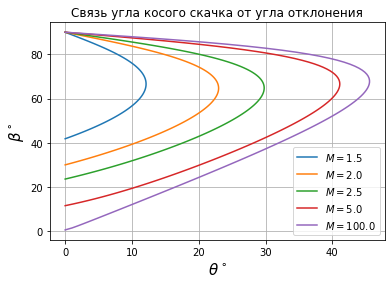

In [4]:
MACH = [1.5, 2.0, 2.5, 5.0, 100.0]
MACH = array(MACH)
MACH_sin = arcsin(1.0/MACH)

for mach, beta in zip(MACH, MACH_sin):

    BETA = linspace(beta, pi/2.0, 100)
    
    THETA = array([])
    for angle in BETA:        
        THETA = append(THETA, rad2deg(arctan(os.fun_theta_beta_m(mach, angle))))
    
    BETA = rad2deg(BETA)
    plt.plot(THETA, BETA, label=r'$M={}$'.format(mach))
    
    plt.title(r'Связь угла косого скачка от угла отклонения')
    plt.xlabel(r'$\theta^\circ$', fontsize=15)
    plt.ylabel(r'$\beta^\circ$', fontsize=15)
    plt.legend()
    plt.grid()

Как мы можем видеть, для каждого числа Маха существует свой максимум отклонения потока. Даже для $M_{\infty}$ мы не можем отклонить поток на $\theta > 46^\circ$. При превышении максимума образуется отошедший скачок уплотнения.

Зачем это нужно? Например, для расчета отношений статических давлений. Давайте попробуем решить данную задачу.

###### Задача. Найти отношение статического давления при $M = 2.0$, $\theta = 5.0^\circ$

Для определения отношений стат. давлений нам потребуется формула (2)

$$\frac{p_1}{p_H}= \frac{2\gamma}{\gamma+1}M_1^2 \sin^2\beta - \frac{\gamma-1}{\gamma+1}$$

В уравнении (1) нам известны число Маха и угол отклонения потока. Угол скачка будем искать методом Ньютона. Для этого используем библиотеку sci-py

In [5]:
f = lambda beta, mach, theta: os.fun_theta_beta_m(mach, beta) - tan(theta)

theta = deg2rad(10.0)
mach = 2.0

beta = optimize.newton(f, deg2rad(20.), args=(mach, theta,))

print(f"Угол косого скачка: {rad2deg(beta):0.2f} град.")

Угол косого скачка: 39.31 град.


Нашли $\beta = 39.31^\circ$, теперь можно найди и перепад стат давлений.

In [6]:
pressure = os.rise_pres(mach, beta)

print(f"Перепад стат. давления: {pressure:0.4f}")

Перепад стат. давления: 1.7066


In [7]:
mach2 = os.calc_mach_os(mach, beta, theta)

print(f"Число Маха за косым скачком: {mach2:0.2f}")

Число Маха за косым скачком: 1.64
